### Decribing Bank Data
Analysis is done by Opeyemi Farinde on Jupyter Notebook
June 2019.

This notebook describe the steps I followed in describing the data sorted and available in CSV. 

Objectives of decription:
A. Data owner required me to describe the data:
1. He is interested in knowing the distribution by sex of the data across three regions in Nigeria.
2. I am required to calculate average on all parameters 
3. The averages are required by him to determine the pulse of events.
 
B. Steps:
1. I imported Pandas, Numpy and Matplotlib and read-in the csv.
2. CSV contains 10,000 rows of data and 210,000 data points.
3. I wanted to see the columns to pick headers with numeric value.
4. Since I am classifying based on geographical locations, I deployed Pandas "GROUPBY" function
5. NC is North Central
6. SW is South West
7. SE is South East

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Raw_Bank_data = pd.read_csv("C:\\Users\Alaka\Desktop\Bank_data.csv")

In [17]:
Raw_Bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Age',
       'Profession', 'Tenure', 'Balance (last week)', 'Balance (today)',
       'Number of accounts', 'HasCrCard', 'Loan amount this month', 'Loan age',
       'Loan type', 'Due loan payment (this month)',
       'No of visits to bank this month', 'Enrolled to Mobile banking today',
       'Deposits this month', 'EstimatedSalary', 'Salary account'],
      dtype='object')

In [18]:
Bank_data = Raw_Bank_data[['RowNumber', 'Geography', 'Gender', 'Age',
       'Profession', 'Tenure', 'Balance (last week)', 'Balance (today)',
       'Number of accounts', 'HasCrCard', 'Loan amount this month', 'Loan age',
       'Loan type', 'Due loan payment (this month)',
       'No of visits to bank this month', 'Enrolled to Mobile banking today',
       'Deposits this month', 'EstimatedSalary', 'Salary account']]

In [19]:
Bank_data.set_index("RowNumber", inplace = True)
grouped_data = Bank_data.groupby("Geography")
NC = pd.DataFrame(grouped_data.get_group("North Central"))
SW = pd.DataFrame(grouped_data.get_group("South West"))
SE = pd.DataFrame(grouped_data.get_group("South East"))

In [20]:
grouped_data.mean()

,Age,Tenure,Balance (last week),Balance (today),Number of accounts,HasCrCard,Loan amount this month,Loan age,Due loan payment (this month),No of visits to bank this month,Deposits this month,EstimatedSalary,Salary account
Geography,,,,,,,,,,,,,
North Central,38.575231,4.991831,82468.338506,82100.391697,1.453755,0.636627,8386.670883,1.509091,206.719120,1.488011,3084.710957,100019.557895,0.841634
South East,39.771622,5.009964,120240.351180,119730.116134,1.519729,0.713830,8796.725389,1.551614,234.315216,1.463930,4315.906819,101113.435102,0.766839
South West,38.700758,5.036255,41904.788051,41556.728899,1.615801,0.576028,8408.487284,1.503788,209.782750,1.474838,1506.025397,99468.227254,0.919643


In [21]:
grouped_data.max()

,Gender,Age,Profession,Tenure,Balance (last week),Balance (today),Number of accounts,HasCrCard,Loan amount this month,Loan age,Loan type,Due loan payment (this month),No of visits to bank this month,Enrolled to Mobile banking today,Deposits this month,EstimatedSalary,Salary account
Geography,,,,,,,,,,,,,,,,,
North Central,Male,92,Skilled,10,294369.0238,238387.56,4,1,19979,5,Other,1942.076323,3,Yes,36422.56720,199992.48,1
South East,Male,84,Skilled,10,286218.1410,214346.96,4,1,19998,5,Other,1949.457342,3,Yes,39054.88442,199970.74,1
South West,Male,85,Skilled,10,285529.9228,250898.09,4,1,19998,5,Other,1934.952781,3,Yes,32621.81713,199953.33,1


In [22]:
grouped_data.min()

,Gender,Age,Profession,Tenure,Balance (last week),Balance (today),Number of accounts,HasCrCard,Loan amount this month,Loan age,Loan type,Due loan payment (this month),No of visits to bank this month,Enrolled to Mobile banking today,Deposits this month,EstimatedSalary,Salary account
Geography,,,,,,,,,,,,,,,,,
North Central,Female,18,Non-Skilled,0,0.00000,0.00,1,0,0,0,Auto,0.0,0,No,0.0,123.07,0
South East,Female,18,Non-Skilled,0,15364.55416,27288.43,1,0,0,0,Auto,0.0,0,No,0.0,11.58,0
South West,Female,18,Non-Skilled,0,0.00000,0.00,1,0,0,0,Auto,0.0,0,No,0.0,90.07,0


In [23]:
grouped_data.describe()

Age                                                      \
                count       mean        std   min   25%   50%   75%   max   
Geography                                                                   
North Central  3795.0  38.575231  10.426681  18.0  32.0  37.0  43.0  92.0   
South East     2509.0  39.771622  10.519143  18.0  32.0  38.0  45.0  84.0   
South West     3696.0  38.700758  10.500326  18.0  32.0  37.0  43.0  85.0   

              Balance (last week)                 ...  Salary account       \
                            count           mean  ...             75%  max   
Geography                                         ...                        
North Central              3795.0   82468.338506  ...             1.0  1.0   
South East                 2509.0  120240.351180  ...             1.0  1.0   
South West                 3696.0   41904.788051  ...             1.0  1.0   

               Tenure                                                
                count      mean       std  min  25%  50%  75%   max  
Geography                                                            
North Central  3795.0  4.991831  2.890952  0.0  2.0  5.0  7.0  10.0  
South East     2509.0  5.009964  2.935154  0.0  2.0  5.0  8.0  10.0  
South West     3696.0  5.036255  2.864516  0.0  3.0  5.0  7.0  10.0  

[3 rows x 104 columns]

In [24]:
NC = NC.groupby("Gender")
SW = SW.groupby("Gender")
SE = SE.groupby("Gender")

In [25]:
NC.get_group("Male").mean()

Age                                    38.435176
Tenure                                  5.059581
Balance (last week)                 84273.107013
Balance (today)                     83449.956273
Number of accounts                      1.427550
HasCrCard                               0.643947
Loan amount this month               8257.566254
Loan age                                1.522402
Due loan payment (this month)         212.804231
No of visits to bank this month         1.486177
Deposits this month                  3209.155191
EstimatedSalary                    100172.266497
Salary account                          0.842707
dtype: float64

In [26]:
NC.get_group("Female").mean()

Age                                   38.748379
Tenure                                 4.908073
Balance (last week)                80237.104372
Balance (today)                    80431.925887
Number of accounts                     1.486152
HasCrCard                              0.627578
Loan amount this month              8546.282852
Loan age                               1.492634
Due loan payment (this month)        199.196101
No of visits to bank this month        1.490277
Deposits this month                 2930.860630
EstimatedSalary                    99830.764349
Salary account                         0.840306
dtype: float64

In [27]:
SW.get_group("Male").mean()

Age                                   38.393539
Tenure                                 5.044542
Balance (last week)                43747.014635
Balance (today)                    43170.312893
Number of accounts                     1.606461
HasCrCard                              0.577093
Loan amount this month              8411.770436
Loan age                               1.524229
Due loan payment (this month)        214.611737
No of visits to bank this month        1.457171
Deposits this month                 1517.673089
EstimatedSalary                    98988.329178
Salary account                         0.913852
dtype: float64

In [28]:
SW.get_group("Female").mean()

Age                                    39.080460
Tenure                                  5.026013
Balance (last week)                 39627.916357
Balance (today)                     39562.444507
Number of accounts                      1.627344
HasCrCard                               0.574713
Loan amount this month               8404.429522
Loan age                                1.478524
Due loan payment (this month)         203.814437
No of visits to bank this month         1.496673
Deposits this month                  1491.629611
EstimatedSalary                    100061.349921
Salary account                          0.926800
dtype: float64

In [29]:
SE.get_group("Male").mean()

Age                                    39.424772
Tenure                                  5.050152
Balance (last week)                121333.577699
Balance (today)                    120259.668222
Number of accounts                      1.527356
HasCrCard                               0.720365
Loan amount this month               8711.444529
Loan age                                1.494681
Due loan payment (this month)         242.539436
No of visits to bank this month         1.471884
Deposits this month                  4411.071020
EstimatedSalary                     99905.033959
Salary account                          0.758359
dtype: float64

In [30]:
SE.get_group("Female").mean()

Age                                    40.154233
Tenure                                  4.965633
Balance (last week)                119034.411448
Balance (today)                    119145.966471
Number of accounts                      1.511316
HasCrCard                               0.706622
Loan amount this month               8890.798826
Loan age                                1.614417
Due loan payment (this month)         225.243067
No of visits to bank this month         1.455155
Deposits this month                  4210.931054
EstimatedSalary                    102446.424124
Salary account                          0.776194
dtype: float64

In [31]:
NC_m = pd.DataFrame(NC.get_group("Male").mean())
SW_m = pd.DataFrame(SW.get_group("Male").mean())
SE_m = pd.DataFrame(SE.get_group("Male").mean())
NC_f = pd.DataFrame(NC.get_group("Female").mean())
SW_f = pd.DataFrame(SW.get_group("Female").mean())
SE_f = pd.DataFrame(SW.get_group("Female").mean())

In [50]:
Male_Averages_Region = pd.concat([NC_m, SW_m, SE_m], keys = ["NC_M", "SW_M", "SE_M"], axis = 1)

In [60]:
Male = Male_Averages_Region
Male

,NC_M,SW_M,SE_M
,0,0,0
Age,38.435176,38.393539,39.424772
Tenure,5.059581,5.044542,5.050152
Balance (last week),84273.107013,43747.014635,121333.577699
Balance (today),83449.956273,43170.312893,120259.668222
Number of accounts,1.427550,1.606461,1.527356
HasCrCard,0.643947,0.577093,0.720365
Loan amount this month,8257.566254,8411.770436,8711.444529
Loan age,1.522402,1.524229,1.494681
Due loan payment (this month),212.804231,214.611737,242.539436


In [52]:
Female_Averages_Region = pd.concat([NC_f, SW_f, SE_f], keys = ["NC_F", "SW_F", "SE_F"], axis = 1)

In [59]:
Female = Female_Averages_Region
Female

,NC_F,SW_F,SE_F
,0,0,0
Age,38.748379,39.080460,39.080460
Tenure,4.908073,5.026013,5.026013
Balance (last week),80237.104372,39627.916357,39627.916357
Balance (today),80431.925887,39562.444507,39562.444507
Number of accounts,1.486152,1.627344,1.627344
HasCrCard,0.627578,0.574713,0.574713
Loan amount this month,8546.282852,8404.429522,8404.429522
Loan age,1.492634,1.478524,1.478524
Due loan payment (this month),199.196101,203.814437,203.814437


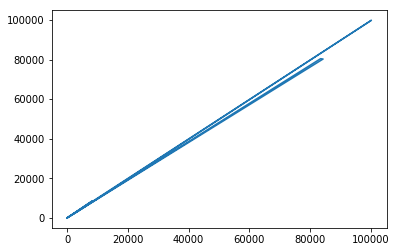

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Male["NC_M"], Female["NC_F"])